In [42]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits
0,0,0,3.0,9.193333,25.00,Female,2023,Mid,"Blonde Bob,Earring,Green Eye Shadow",3
1,1,1,3.0,30.473333,60.00,Male,4352,Dark,"Mohawk,Smile",2
2,14,14,3.0,1.750000,2.50,Female,155,Dark,"Hot Lipstick,Pilot Helmet,Pipe",3
3,33,33,1.0,0.510000,0.51,Male,7635,Light,Peak Spike,1
4,53,53,2.0,21.000000,22.00,Female,2825,Light,"Big Shades,Straight Hair",2


In [48]:
df.shape

(5615, 10)

In [49]:
df.drop(['Unnamed: 0','max_sold_price','traits'],axis=1,inplace=True)
df['types'] = df.types.map({'Male':1,'Female':1,'Ape':0,'Zombie':0,'Alien':0})
df['skin'] = df.skin.map({'Mid':1,'Dark':1,'Light':1,'Albino':1,'Ape':0,'Zombie':0,'Alien':0})
df.total_sold = df['total_sold'].astype(int)
df.head()

,id,total_sold,avg_sold_price,types,rarity,skin,total_traits
0,0,3,9.193333,1,2023,1,3
1,1,3,30.473333,1,4352,1,2
2,14,3,1.750000,1,155,1,3
3,33,1,0.510000,1,7635,1,1
4,53,2,21.000000,1,2825,1,2


In [50]:
df.shape

(5615, 7)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
reg = LinearRegression()

In [55]:
X = df.drop('avg_sold_price',axis=1)
y = df['avg_sold_price']

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [59]:
reg.fit(X_train,y_train)

LinearRegression()

In [62]:
predictions = reg.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score,r2_score

In [67]:
r2_score(y_test,predictions)

0.11297627835962798

In [16]:
X = df1.drop('avg_sold_price',axis=1)
y = df1['avg_sold_price']

In [ ]:
correlation_matrix = df1.iloc[:,1:10].corr().round(2)
sns.heatmap(data=correlation_matrix, square=True,cmap='coolwarm',annot=True)
plt.show()
#cmap='RdYlGn'

<AxesSubplot:xlabel='total_sold'>

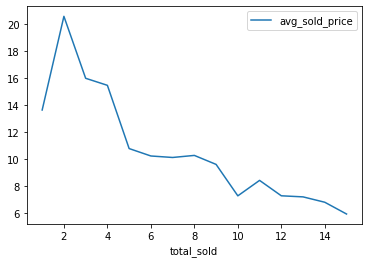